# This is a continuation of the employee attrition project
# Here we'll attempt to predict how long an employee will remain with the company.
# We'll piggyback off our previous analysis, so this should be quick

In [12]:
# This is where we begin importing libraries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [13]:
#import our data source for preliminary analysis
# The most important feature here is 'Years at company'
df = pd.read_csv('./desktop/attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


<AxesSubplot:xlabel='Attrition', ylabel='YearsAtCompany'>

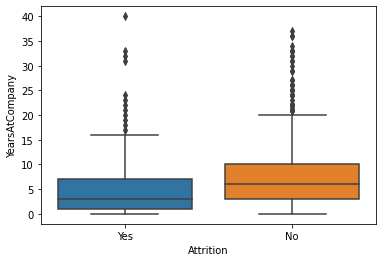

In [14]:
#comparing attrition with years at company
sns.boxplot(x = 'Attrition', y = 'YearsAtCompany', data = df)

In [15]:
# Features dropped for being irrelevant
df.drop(['Attrition', 'BusinessTravel', 'EducationField', 'JobRole', 'StandardHours', 'Over18','MaritalStatus', 'Gender', 'OverTime', 'Department', 'DailyRate', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'HourlyRate', 'MonthlyRate'], axis = 1, inplace = True)

In [16]:
df.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,2,3,2,4,5993,8,11,3,1,0,8,0,1,6,4,0,5
1,49,8,1,3,2,2,2,5130,1,23,4,4,1,10,3,3,10,7,1,7
2,37,2,2,4,2,1,3,2090,6,15,3,2,0,7,3,3,0,0,0,0
3,33,3,4,4,3,1,3,2909,1,11,3,3,0,8,3,3,8,7,3,0
4,27,2,1,1,3,1,2,3468,9,12,3,4,1,6,3,3,2,2,2,2


In [17]:
# Features dropped for high correlation strength, to avoid dilution in model clarity.
df.drop(['JobLevel', 'TotalWorkingYears', 'PercentSalaryHike', 'YearsWithCurrManager', 'YearsInCurrentRole', 'StockOptionLevel'], axis = 1, inplace = True)
df.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,1,2,2,3,4,5993,8,3,1,0,1,6,0
1,49,8,1,3,2,2,5130,1,4,4,3,3,10,1
2,37,2,2,4,2,3,2090,6,3,2,3,3,0,0
3,33,3,4,4,3,3,2909,1,3,3,3,3,8,3
4,27,2,1,1,3,2,3468,9,3,4,3,3,2,2


## The final step, we're going to predict attrition using 2 classification algorithms.
## To do this and improve performance, we'll be using a voting ensemble (Voting regressor).
## We'll be using Linear regression, Ridge regression.

In [18]:
#We shall begin as usual by importing from really important libraries
from sklearn.model_selection import train_test_split

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

In [39]:
## Picking my dependent (Y) and independent variables (X)
X = df.drop('YearsAtCompany', axis = 1)
y = df['YearsAtCompany']

In [40]:
#Split our data sets into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)

In [53]:
#We create a tuple of our selected models we want to test
models = [('lr', LinearRegression()), ('rr', Ridge(alpha = 0.5))]
#We pick our ensemble type
model = VotingRegressor(models)
model.fit(X_train, y_train)
#We make our predictions
predict = model.predict(X_test)


In [50]:
#Next, we evaluate our model performance
mse = mean_squared_error(y_test, predict)
rmse = np.sqrt(mse)
r2_score = model.score(X_train, y_train)
print(f'Mean squared error:', mse)
print('root mean squared error', rmse)
print('r2_score', r2_score)

Mean squared error: 18.706657637517235
root mean squared error 4.325119378412258
r2_score 0.5166047146998477


### The model works very well!
### Our r2 though?! I wonder why

In [51]:
# Time to save our model for future use
import pickle

In [52]:
filename = 'regr_attrition.sav'
pickle.dump (model, open(filename, 'wb'))

# Finished 18-April-2023